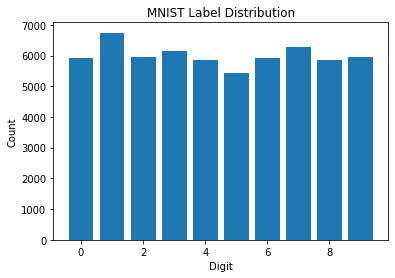

In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
transform = transforms.ToTensor()
mnist_dataset = datasets.MNIST(root='mnist_data', train=True, transform=transform, download=True)

# Count labels
label_counts = mnist_dataset.targets.bincount()

plt.bar(range(10), label_counts)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('MNIST Label Distribution')
plt.show()

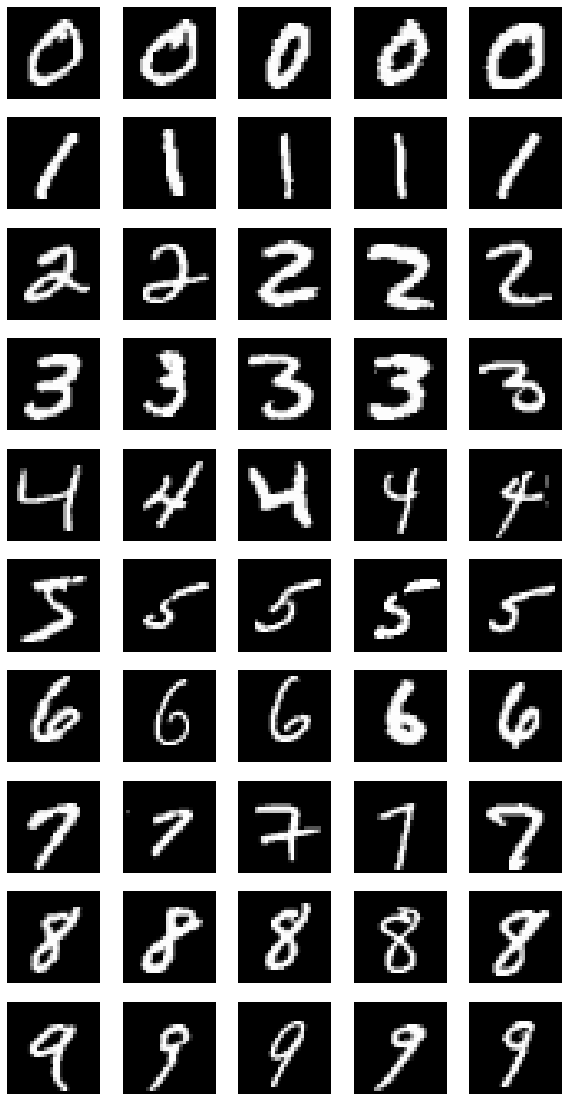

In [3]:
fig, axs = plt.subplots(10, 5, figsize=(10, 20))
for i in range(10):
    samples = [img for img, label in mnist_dataset if label == i][:5]
    for j, sample in enumerate(samples):
        axs[i][j].imshow(sample[0], cmap='gray')
        axs[i][j].axis('off')

In [4]:
from torch.utils.data import random_split

train_size = int(0.8 * len(mnist_dataset))
val_size = int(0.1 * len(mnist_dataset))
test_size = len(mnist_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(mnist_dataset, [train_size, val_size, test_size])

<h3>CNN Model</h3>

In [5]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
class CustomCNN(nn.Module):
    def __init__(self, kernel_sz=3, dropout_rate=0.25, stride=1):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=kernel_sz, padding=(kernel_sz-1)//2, stride=stride)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=kernel_sz, padding=(kernel_sz-1)//2, stride=stride)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.dropout = self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, 10)  # 10 output classes

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)  # Reshape for fully connected layer
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [6]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

### Hyperparameter tuning of CNN

In [7]:
learning_rates = [0.001, 0.008]
kernel_sizes = [3, 5]
num_epochs = [5, 10]
dropout_rates = [0, 0.25]
strides = [1]

import wandb

for lr in learning_rates:
    for kernel_sz in kernel_sizes:
        for epochs in num_epochs:
            for dropout_rate in dropout_rates:
                for stride in strides:
                    run = wandb.init(
                        project="cnn-autoencoder-smai", name=f"{lr}+{kernel_sz}+{epochs}+{dropout_rate}"
                    )
                    model = CustomCNN(kernel_sz, dropout_rate, stride)
                    criterion = nn.CrossEntropyLoss()
                    optimizer = optim.Adam(model.parameters(), lr=0.001)
                    for epoch in range(epochs):
                        model.train()
                        train_loss = 0
                        correct_train = 0
                        total_train = 0
                        correct_val = 0
                        total_val = 0
                        val_loss = 0

                        for images, labels in train_loader:
                            optimizer.zero_grad()
                            outputs = model(images)
                            loss = criterion(outputs, labels)
                            loss.backward()
                            optimizer.step()

                            train_loss += loss.item()
                            _, predicted = outputs.max(1)
                            total_train += labels.size(0)
                            correct_train += predicted.eq(labels).sum().item()

                        with torch.no_grad():
                            for images, labels in val_loader:
                                outputs = model(images)
                                loss = criterion(outputs, labels)
                                val_loss += loss.item()
                                _, predicted = outputs.max(1)
                                total_val += labels.size(0)
                                correct_val += predicted.eq(labels).sum().item()

                        train_loss /= total_train
                        val_loss /= total_val
                        train_accuracy = 100 * correct_train / total_train
                        val_accuracy = 100 * correct_val / total_val

                    wandb.log({
                        'Epochs': epoch,
                        'Learning Rate': lr,
                        'Kernel Size': kernel_sz,
                        'Dropout Rate': dropout_rate,
                        'Stride': stride,
                        'Validation Accuracy': val_accuracy,
                        'Validation Loss': val_loss,
                        'Train Loss': train_loss,
                        'Training Accuracy': train_accuracy,
                    })

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rohan-victorious108. Use `wandb login --relogin` to force relogin


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Dropout Rate,▁
Epochs,▁
Kernel Size,▁
Learning Rate,▁
Stride,▁
Train Loss,▁
Training Accuracy,▁
Validation Accuracy,▁
Validation Loss,▁
Dropout Rate,0
Epochs,4


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Dropout Rate,▁
Epochs,▁
Kernel Size,▁
Learning Rate,▁
Stride,▁
Train Loss,▁
Training Accuracy,▁
Validation Accuracy,▁
Validation Loss,▁
Dropout Rate,0.25
Epochs,4


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Dropout Rate,▁
Epochs,▁
Kernel Size,▁
Learning Rate,▁
Stride,▁
Train Loss,▁
Training Accuracy,▁
Validation Accuracy,▁
Validation Loss,▁
Dropout Rate,0
Epochs,9


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Dropout Rate,▁
Epochs,▁
Kernel Size,▁
Learning Rate,▁
Stride,▁
Train Loss,▁
Training Accuracy,▁
Validation Accuracy,▁
Validation Loss,▁
Dropout Rate,0.25
Epochs,9


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Dropout Rate,▁
Epochs,▁
Kernel Size,▁
Learning Rate,▁
Stride,▁
Train Loss,▁
Training Accuracy,▁
Validation Accuracy,▁
Validation Loss,▁
Dropout Rate,0
Epochs,4


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Dropout Rate,▁
Epochs,▁
Kernel Size,▁
Learning Rate,▁
Stride,▁
Train Loss,▁
Training Accuracy,▁
Validation Accuracy,▁
Validation Loss,▁
Dropout Rate,0.25
Epochs,4


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Dropout Rate,▁
Epochs,▁
Kernel Size,▁
Learning Rate,▁
Stride,▁
Train Loss,▁
Training Accuracy,▁
Validation Accuracy,▁
Validation Loss,▁
Dropout Rate,0
Epochs,9


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Dropout Rate,▁
Epochs,▁
Kernel Size,▁
Learning Rate,▁
Stride,▁
Train Loss,▁
Training Accuracy,▁
Validation Accuracy,▁
Validation Loss,▁
Dropout Rate,0.25
Epochs,9


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Dropout Rate,▁
Epochs,▁
Kernel Size,▁
Learning Rate,▁
Stride,▁
Train Loss,▁
Training Accuracy,▁
Validation Accuracy,▁
Validation Loss,▁
Dropout Rate,0
Epochs,4


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Dropout Rate,▁
Epochs,▁
Kernel Size,▁
Learning Rate,▁
Stride,▁
Train Loss,▁
Training Accuracy,▁
Validation Accuracy,▁
Validation Loss,▁
Dropout Rate,0.25
Epochs,4


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Dropout Rate,▁
Epochs,▁
Kernel Size,▁
Learning Rate,▁
Stride,▁
Train Loss,▁
Training Accuracy,▁
Validation Accuracy,▁
Validation Loss,▁
Dropout Rate,0
Epochs,9


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Dropout Rate,▁
Epochs,▁
Kernel Size,▁
Learning Rate,▁
Stride,▁
Train Loss,▁
Training Accuracy,▁
Validation Accuracy,▁
Validation Loss,▁
Dropout Rate,0.25
Epochs,9


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Thread SenderThread:
Traceback (most recent call last):
  File "/home/rohan/.local/lib/python3.10/site-packages/wandb/sdk/internal/internal_util.py", line 49, in run
    self._run()
  File "/home/rohan/.local/lib/python3.10/site-packages/wandb/sdk/internal/internal_util.py", line 100, in _run
    self._process(record)
  File "/home/rohan/.local/lib/python3.10/site-packages/wandb/sdk/internal/internal.py", line 328, in _process
    self._sm.send(record)
  File "/home/rohan/.local/lib/python3.10/site-packages/wandb/sdk/internal/sender.py", line 376, in send
    send_handler(record)
  File "/home/rohan/.local/lib/python3.10/site-packages/wandb/sdk/internal/sender.py", line 976, in send_run
    self._start_run_threads(file_dir)
  File "/home/rohan/.local/lib/python3.10/site-packages/wandb/sdk/internal/sender.py", line 1097, in _start_run_threads
    self._dir_watcher = DirWatcher(
  File "/home/rohan/.local/lib/python3.10/site-packages/wandb/filesync/dir_watcher.py", line 210, in __init__


Problem at: /tmp/ipykernel_12188/2086420111.py 14 <module>


MailboxError: transport failed

In [5]:
import wandb

device="cpu"

# wandb.init(project="cnn-autoencoder-smai")

# Initialize model and optimizer
model = CustomCNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    n_samples=0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        output = output.to(device)
        n_samples+=len(data)
        loss = criterion(output, target)
        total_train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct_train += pred.eq(target.view_as(pred)).sum().item()
        loss.backward()
        optimizer.step()
    
    train_loss = total_train_loss / n_samples
    train_accuracy = 100. * correct_train / n_samples
    
    model.eval()
    total_val_loss = 0
    correct_val = 0
    with torch.no_grad():
        n_samples=0
        for data, target in val_loader:
            data = data.to(device)
            target = target.to(device)
            output = model(data)
            output = output.to(device)
            n_samples += len(data)
            total_val_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct_val += pred.eq(target.view_as(pred)).sum().item()
    
    val_loss = total_val_loss / n_samples
    val_accuracy = 100. * correct_val / n_samples
    # wandb.log({"train_accuracy":train_accuracy,"train_loss":train_loss,"val_accuracy":val_accuracy,"val_loss":val_loss})
    print(f"Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss : {val_loss:.4f}, Train Acc: {train_accuracy}, Val acc : {val_accuracy}")

torch.save(model.state_dict(),'best_mnist_model.pth')

/home/rohan/.local/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 1/30, Train Loss: 0.0052, Val Loss : 0.0022, Train Acc: 94.87916666666666, Val acc : 98.2
Epoch: 2/30, Train Loss: 0.0019, Val Loss : 0.0018, Train Acc: 98.13958333333333, Val acc : 98.51666666666667
Epoch: 3/30, Train Loss: 0.0014, Val Loss : 0.0020, Train Acc: 98.57083333333334, Val acc : 98.35
Epoch: 4/30, Train Loss: 0.0011, Val Loss : 0.0019, Train Acc: 98.82708333333333, Val acc : 98.45
Epoch: 5/30, Train Loss: 0.0010, Val Loss : 0.0016, Train Acc: 98.99791666666667, Val acc : 98.68333333333334
Epoch: 6/30, Train Loss: 0.0008, Val Loss : 0.0018, Train Acc: 99.15416666666667, Val acc : 98.58333333333333
Epoch: 7/30, Train Loss: 0.0007, Val Loss : 0.0019, Train Acc: 99.23333333333333, Val acc : 98.58333333333333
Epoch: 8/30, Train Loss: 0.0006, Val Loss : 0.0020, Train Acc: 99.35416666666667, Val acc : 98.78333333333333
Epoch: 9/30, Train Loss: 0.0005, Val Loss : 0.0020, Train Acc: 99.4375, Val acc : 98.55
Epoch: 10/30, Train Loss: 0.0005, Val Loss : 0.0022, Train Acc: 99.47

<h3>Visualizing Feature Maps </h3>

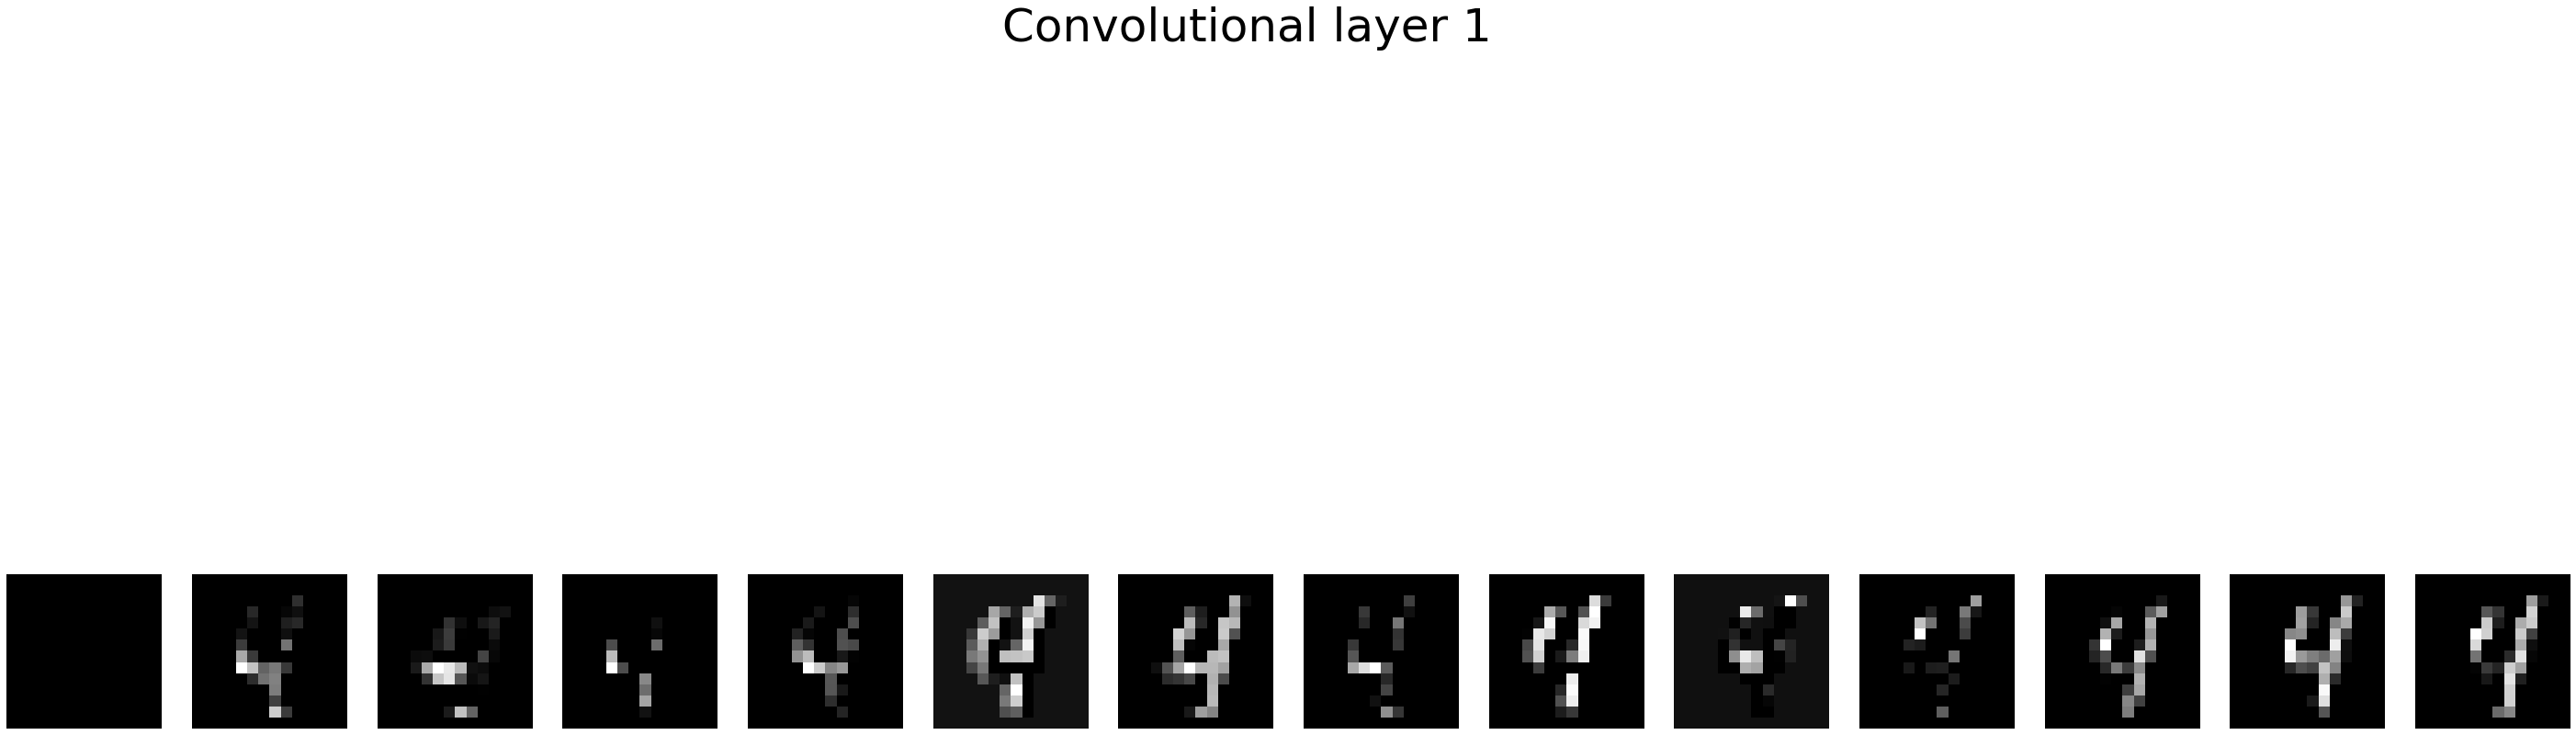

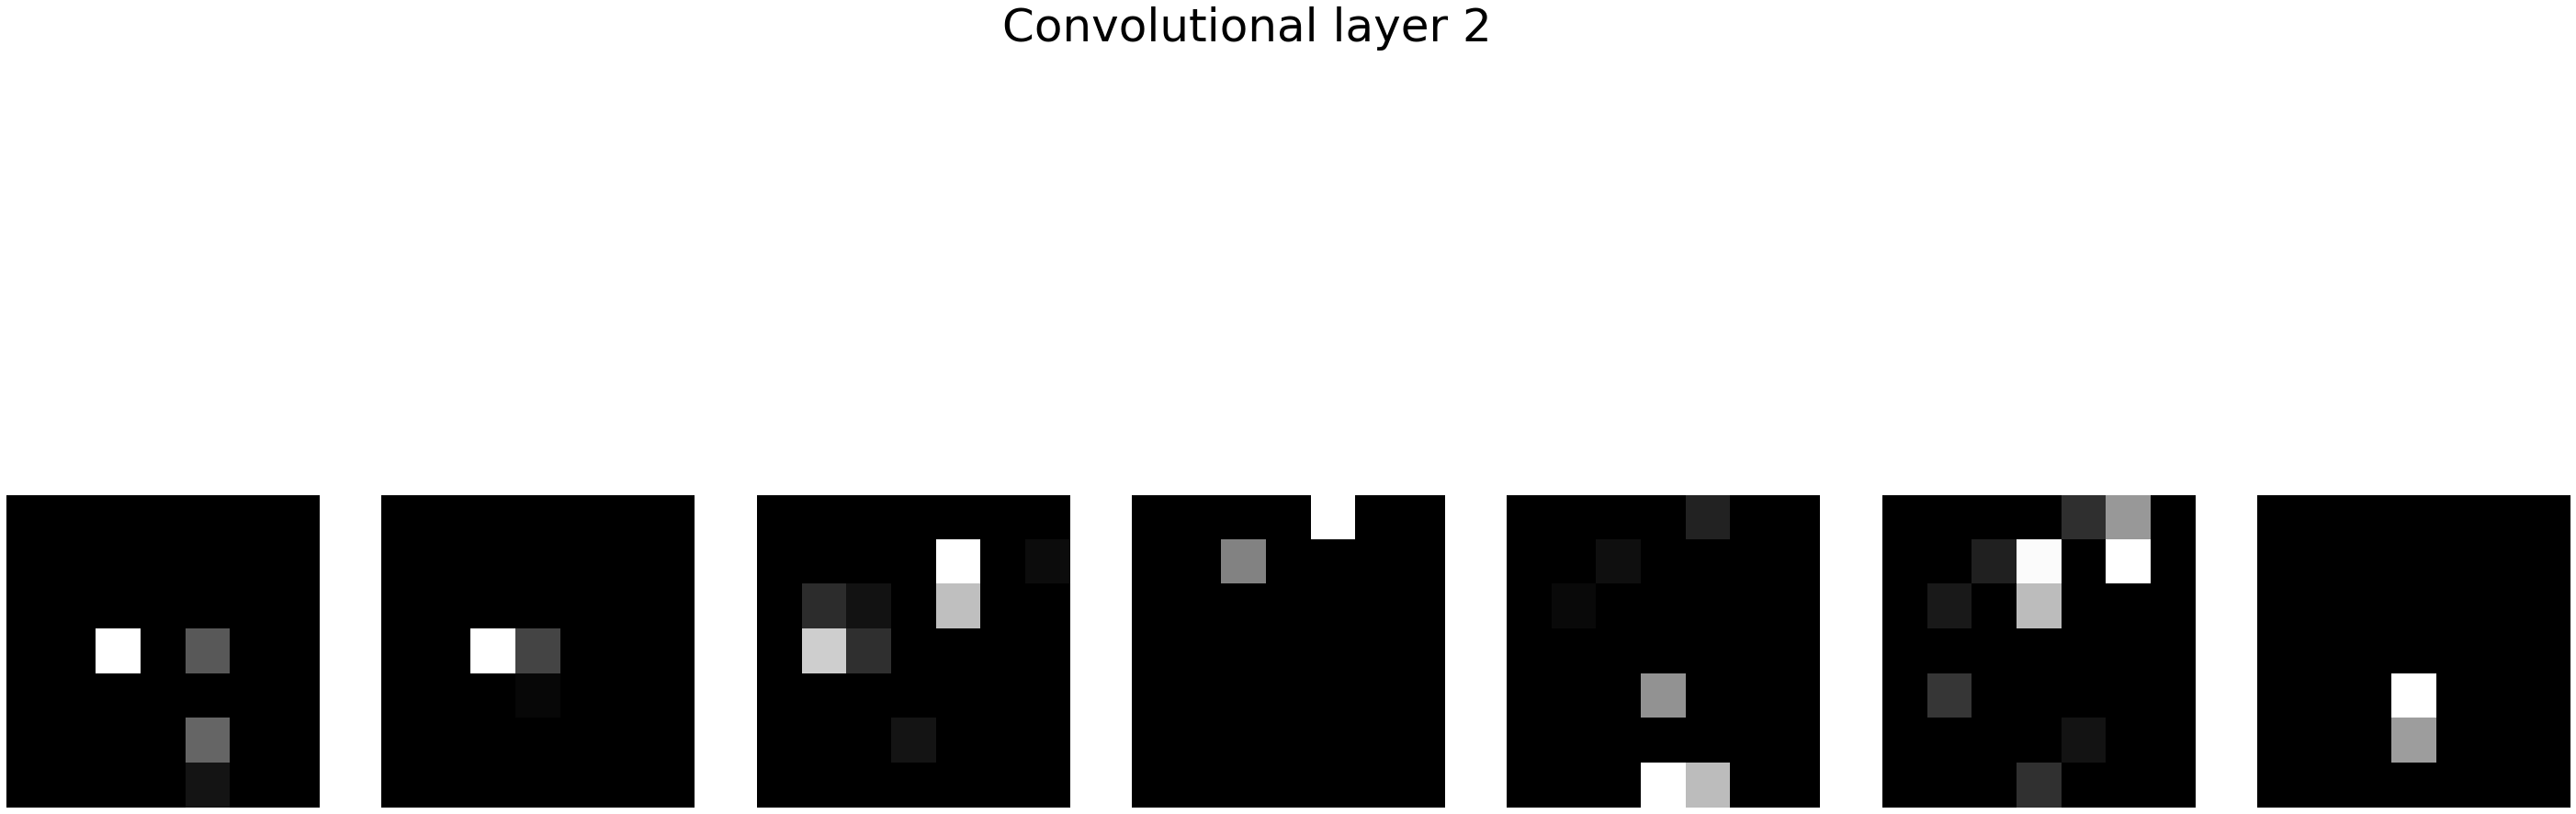

In [6]:
import matplotlib.pyplot as plt

def visualize_feature_maps(model, data_loader):
    model.eval()
    # Taking one batch from the data_loader
    images, _ = next(iter(data_loader))
    images = images[0]
#     print(len(images))
    images = images.to(device)
    with torch.no_grad():
        feature_maps1 = model.pool1(model.relu1(model.conv1(images)))
        feature_maps2 = model.pool2(model.relu2(model.conv2(feature_maps1)))
        

    fig, axes = plt.subplots(len(images), feature_maps1[0].shape[0],figsize=(50,100))
    fig.suptitle('Convolutional layer 1', y=0.6, fontsize=50)
#     print(feature_maps1[1].shape)
#     plt.title('Feature maps for the digit after 1st conv layer + maxpool',fontsize=100,loc='left')
    for i in range(len(images)):
        for j in range(feature_maps1[0].shape[0]):
            axes[j].imshow(feature_maps1[j].cpu(), cmap='gray')
            axes[j].axis('off')
    
    plt.subplots_adjust(hspace=1)

    # Similarly, you can display for the second layer

    # Space between the two main titles
    
    fig, axes = plt.subplots(len(images), feature_maps2[0].shape[0],figsize=(50,100))
    # Central heading for the second plot, adjust `y` to position it correctly
    fig.suptitle('Convolutional layer 2', y=0.6, fontsize=50)

#     plt.title('Feature maps for the digit after 2nd conv layer + maxpool',fontsize=100,loc='left')
    for i in range(len(images)):
        for j in range(feature_maps2[0].shape[0]):
            axes[j].imshow(feature_maps2[j].cpu(), cmap='gray')
            axes[j].axis('off')
    plt.show()

visualize_feature_maps(model, train_loader)

In [7]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data, labels in test_loader:
            data = data.to(device)
            outputs = model(data)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"Overall Accuracy: {acc * 100:.2f}%")
    
    report = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)])
    print("\nClassification Report:")
    print(report)

    return all_labels, all_preds

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [9]:
evaluate_model(model,test_loader)
print("Done")

Overall Accuracy: 98.88%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       581
           1       0.99      1.00      0.99       675
           2       0.99      0.99      0.99       617
           3       1.00      0.99      0.99       608
           4       1.00      0.98      0.99       612
           5       0.99      0.99      0.99       546
           6       0.99      0.98      0.99       575
           7       0.98      0.99      0.98       615
           8       0.99      0.99      0.99       587
           9       0.98      0.98      0.98       584

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

Done


<h3>Plot confusion matrix</h3>

Overall Accuracy: 98.88%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       581
           1       0.99      1.00      0.99       675
           2       0.99      0.99      0.99       617
           3       1.00      0.99      0.99       608
           4       1.00      0.98      0.99       612
           5       0.99      0.99      0.99       546
           6       0.99      0.98      0.99       575
           7       0.98      0.99      0.98       615
           8       0.99      0.99      0.99       587
           9       0.98      0.98      0.98       584

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



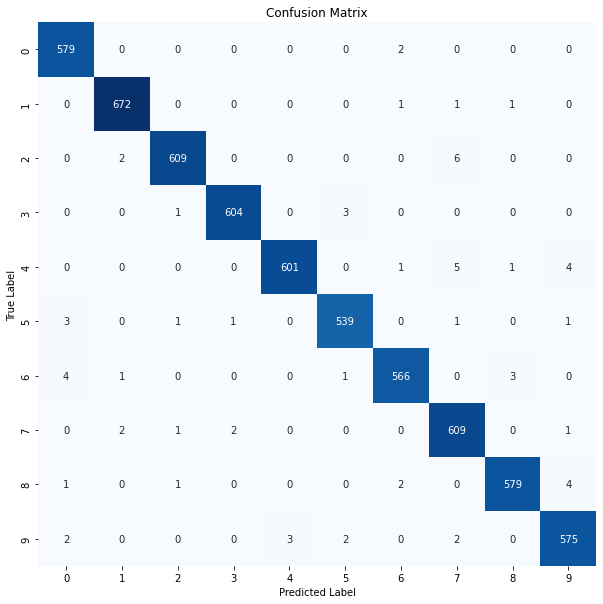

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(labels, preds):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

labels, preds = evaluate_model(model, test_loader)
plot_confusion_matrix(labels, preds)

<h3>Incorrect Predictions</h3>

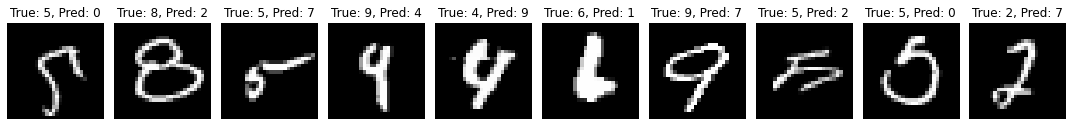

In [11]:
def visualize_incorrect_predictions(model, test_loader, num_samples=10):
    model.eval()
    incorrect_images = []
    incorrect_preds = []
    true_labels = []

    with torch.no_grad():
        for data, labels in test_loader:
            data = data.to(device)
            outputs = model(data)
            _, preds = torch.max(outputs, 1)
            
            for i in range(len(labels)):
                if labels[i] != preds[i]:
                    incorrect_images.append(data[i])
                    incorrect_preds.append(preds[i].cpu().numpy())
                    true_labels.append(labels[i].cpu().numpy())
                    
            if len(incorrect_images) > num_samples:
                break

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(incorrect_images[i].squeeze().cpu(), cmap='gray')
        axes[i].set_title(f"True: {true_labels[i]}, Pred: {incorrect_preds[i]}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

visualize_incorrect_predictions(model, test_loader)

<h3>Train on Noisy dataset</h3>

In [6]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
json_dataset = loadmat('mnist-with-awgn.mat')

In [8]:
train_x = json_dataset['train_x']
train_y = json_dataset['train_y']

test_x = json_dataset['test_x']
test_y = json_dataset['test_y']

In [9]:
train_x.shape

(60000, 784)

In [10]:
train_y.shape

(60000, 10)

In [11]:
test_x.shape

(10000, 784)

In [12]:
test_y.shape

(10000, 10)

In [13]:
"""
Converting it back into dataset form
"""

train_x = train_x.reshape((train_x.shape[0],28,28))
test_x = test_x.reshape((test_x.shape[0],28,28))

print(train_x.shape,test_x.shape)

(60000, 28, 28) (10000, 28, 28)


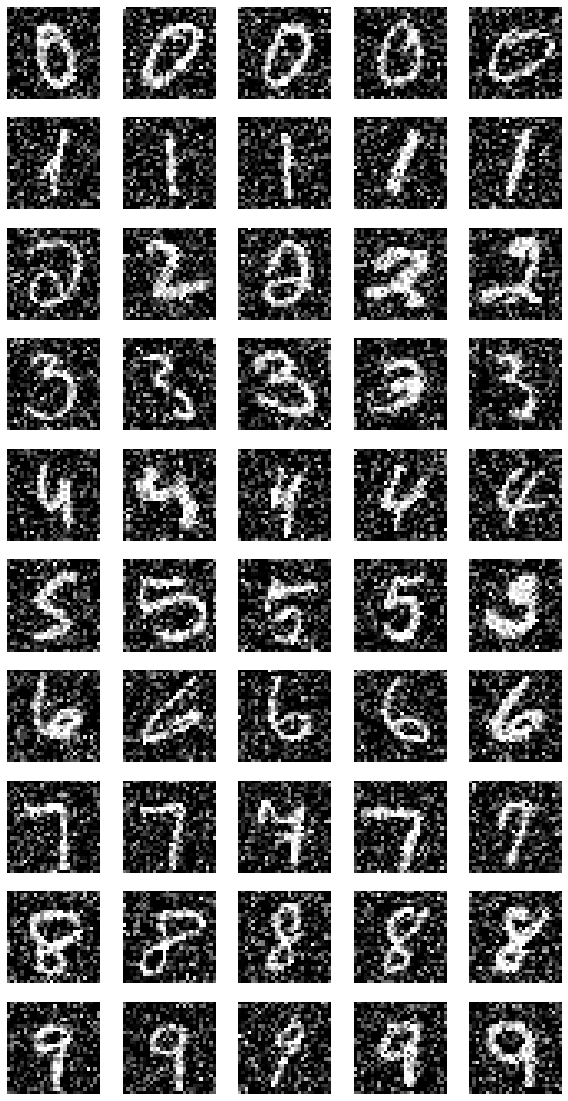

In [14]:
fig, axs = plt.subplots(10, 5, figsize=(10, 20))
for i in range(10):
    samples = [img for img, label in zip(train_x,train_y) if np.argmax(label) == i][:5]
    for j, sample in enumerate(samples):
        axs[i][j].imshow(sample, cmap='gray')
        axs[i][j].axis('off')

In [15]:
# get the pretrained best_model

pretrained_model = CustomCNN() 
pretrained_model.load_state_dict(torch.load('best_mnist_model.pth'))

print(pretrained_model.parameters)

<bound method Module.parameters of CustomCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)>


In [16]:
from torchvision.transforms import ToTensor

class NoisyMNISTdataset():
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.length = len(X)
        
    def __getitem__(self,index):
            transform = ToTensor()
            return transform(self.X[index]),np.argmax(self.y[index])
    
    def __len__(self):
        return self.length

In [17]:
import wandb

# wandb.init(project="cnn-autoencoder-smai")

train_dataset = NoisyMNISTdataset(train_x,train_y)
test_dataset = NoisyMNISTdataset(test_x,test_y)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


device="cpu"

# Initialize model and optimizer
pretrained_model = pretrained_model.to(device)

optimizer = optim.Adam(pretrained_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    pretrained_model.train()
    total_train_loss = 0
    correct_train = 0
    n_samples=0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device).float()
        target = target.to(device)
        output = pretrained_model(data)
        output = output.to(device)
        n_samples+=len(data)
        loss = criterion(output, target)
        total_train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct_train += pred.eq(target.view_as(pred)).sum().item()
        loss.backward()
        optimizer.step()
    
    train_loss = total_train_loss / n_samples
    train_accuracy = 100. * correct_train / n_samples
    
    pretrained_model.eval()
    total_val_loss = 0
    correct_val = 0
    with torch.no_grad():
        n_samples=0
        for data, target in val_loader:
            data = data.to(device).float()
            target = target.to(device)
            output = pretrained_model(data)
            output = output.to(device)
            n_samples += len(data)
            total_val_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct_val += pred.eq(target.view_as(pred)).sum().item()
    
    val_loss = total_val_loss / n_samples
    val_accuracy = 100. * correct_val / n_samples
    
    # wandb.log({"train_accuracy":train_accuracy,"train_loss":train_loss,"val_accuracy":val_accuracy,"val_loss":val_loss})
    
    print(f"Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss : {val_loss:.4f}, Train Acc: {train_accuracy}, Val acc : {val_accuracy}")

/home/rohan/.local/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 1/30, Train Loss: 0.0032, Val Loss : 0.0003, Train Acc: 97.09666666666666, Val acc : 99.61666666666666
Epoch: 2/30, Train Loss: 0.0016, Val Loss : 0.0004, Train Acc: 98.36666666666666, Val acc : 99.68333333333334
Epoch: 3/30, Train Loss: 0.0012, Val Loss : 0.0004, Train Acc: 98.77833333333334, Val acc : 99.7
Epoch: 4/30, Train Loss: 0.0009, Val Loss : 0.0004, Train Acc: 98.96166666666667, Val acc : 99.65
Epoch: 5/30, Train Loss: 0.0008, Val Loss : 0.0004, Train Acc: 99.11333333333333, Val acc : 99.6
Epoch: 6/30, Train Loss: 0.0006, Val Loss : 0.0005, Train Acc: 99.35666666666667, Val acc : 99.58333333333333
Epoch: 7/30, Train Loss: 0.0005, Val Loss : 0.0005, Train Acc: 99.47, Val acc : 99.51666666666667
Epoch: 8/30, Train Loss: 0.0005, Val Loss : 0.0003, Train Acc: 99.46666666666667, Val acc : 99.7
Epoch: 9/30, Train Loss: 0.0004, Val Loss : 0.0003, Train Acc: 99.52166666666666, Val acc : 99.73333333333333
Epoch: 10/30, Train Loss: 0.0003, Val Loss : 0.0006, Train Acc: 99.628333

<h3>Inference for the noisy dataset retrained model</h3>

In [18]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data, labels in test_loader:
            data = data.to(device)
            outputs = model(data)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"Overall Accuracy: {acc * 100:.2f}%")
    
    report = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)])
    print("\nClassification Report:")
    print(report)

    return all_labels, all_preds

In [19]:
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [21]:
evaluate_model(pretrained_model,test_loader)
print("Done")

Overall Accuracy: 97.54%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.95      0.98      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Done


Overall Accuracy: 97.54%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.95      0.98      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



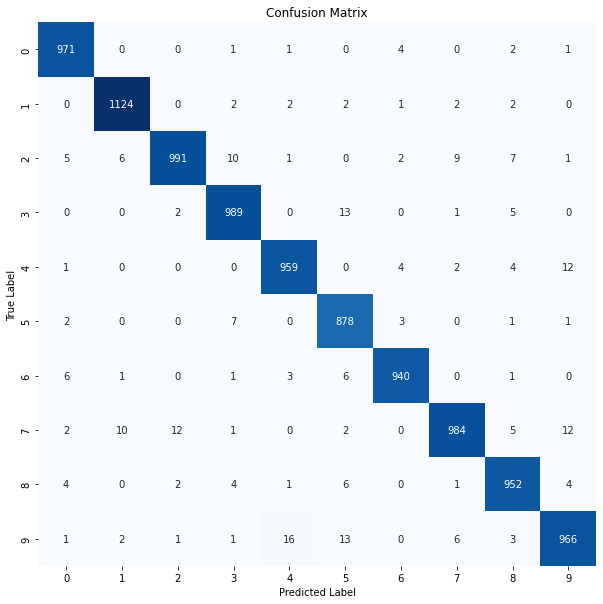

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(labels, preds):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

labels, preds = evaluate_model(pretrained_model, test_loader)
plot_confusion_matrix(labels, preds)

<h2>Autoencoders</h2>

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

class Autoencoder(nn.Module):
    def __init__(self, encoding_dim=32):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, encoding_dim),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 28 * 28),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

def train_autoencoder(model, train_loader, val_loader, epochs=10):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())
    
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for data, _ in train_loader:
            data = data.view(data.size(0), -1)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, data)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss/len(train_loader))
        
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, _ in val_loader:
                data = data.view(data.size(0), -1)
                outputs = model(data)
                loss = criterion(outputs, data)
                val_loss += loss.item()
        val_losses.append(val_loss/len(val_loader))
        
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}')
    
    return train_losses, val_losses

In [25]:
transform = transforms.ToTensor()

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)

def add_noise(data, noise_factor=0.4):
    data = data + noise_factor * torch.randn(data.shape)
    data = torch.clamp(data, 0., 1.)
    return data

noisy_train_loader = [(add_noise(data), target) for data, target in train_loader]


In [26]:
model = Autoencoder()

# Split training data into train and validation
from torch.utils.data import random_split

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

train_subset_loader = torch.utils.data.DataLoader(train_subset, batch_size=256, shuffle=True)
val_subset_loader = torch.utils.data.DataLoader(val_subset, batch_size=256)
train_losses, val_losses = train_autoencoder(model, train_subset_loader, val_subset_loader)

Epoch 1/10, Train Loss: 0.0859, Val Loss: 0.0492
Epoch 2/10, Train Loss: 0.0418, Val Loss: 0.0368
Epoch 3/10, Train Loss: 0.0334, Val Loss: 0.0306
Epoch 4/10, Train Loss: 0.0284, Val Loss: 0.0262
Epoch 5/10, Train Loss: 0.0244, Val Loss: 0.0230
Epoch 6/10, Train Loss: 0.0218, Val Loss: 0.0209
Epoch 7/10, Train Loss: 0.0200, Val Loss: 0.0194
Epoch 8/10, Train Loss: 0.0185, Val Loss: 0.0178
Epoch 9/10, Train Loss: 0.0171, Val Loss: 0.0168
Epoch 10/10, Train Loss: 0.0163, Val Loss: 0.0162


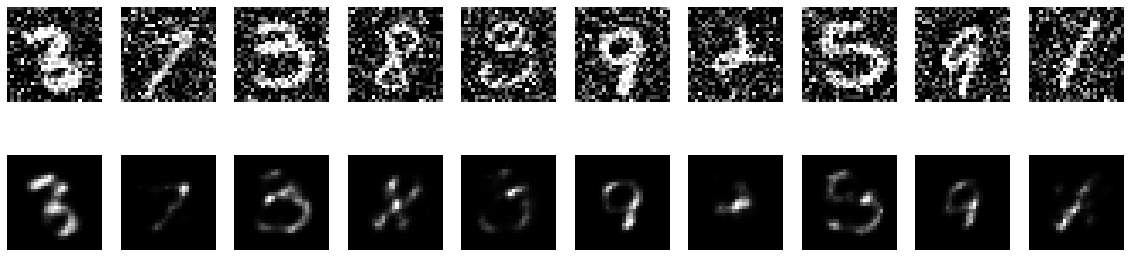

In [27]:
import matplotlib.pyplot as plt

def visualize_images(original_images, denoised_images, n=10):
    """
    Display original and denoised images side by side.

    :param original_images: Tensor of original images
    :param denoised_images: Tensor of denoised images by the autoencoder
    :param n: Number of images to display
    """

    fig, axes = plt.subplots(2, n, figsize=(20, 5))

    for i in range(n):
        # Display original
        ax = axes[0, i]
        ax.imshow(original_images[i].detach().numpy().reshape(28, 28), cmap='gray')
        ax.axis('off')

        # Display reconstruction
        ax = axes[1, i]
        ax.imshow(denoised_images[i].detach().numpy().reshape(28, 28), cmap='gray')
        ax.axis('off')

    plt.show()

# Sample a batch from the noisy_train_loader
noisy_data, _ = next(iter(noisy_train_loader))
with torch.no_grad():
    denoised_data = model(noisy_data.view(noisy_data.size(0), -1)).view(noisy_data.size(0), 1, 28, 28)

visualize_images(noisy_data, denoised_data)

### Training the classifier on the Training denoised data

In [28]:
class SimpleClassifier(nn.Module):
    def __init__(self):
        super(SimpleClassifier, self).__init__()
        self.fc = nn.Linear(28*28, 10)

    def forward(self, x):
        return self.fc(x)

def train_classifier(model, train_loader, val_loader, epochs=20):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(),lr=0.01)
    
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct_train = 0
        total_train = 0
        for (data, targets) in train_loader:
            data = data.view(data.size(0), -1)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            _, predicted = outputs.max(1)
            total_train += targets.size(0)
            correct_train += predicted.eq(targets).sum().item()

        train_accuracies.append(100 * correct_train / total_train)
        train_losses.append(train_loss/len(train_loader))

        model.eval()
        val_loss = 0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for data, targets in val_loader:
                data = data.view(data.size(0), -1)
                outputs = model(data)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

                _, predicted = outputs.max(1)
                total_val += targets.size(0)
                correct_val += predicted.eq(targets).sum().item()

        val_accuracies.append(100 * correct_val / total_val)
        val_losses.append(val_loss/len(val_loader))
        
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}, Train Acc: {100 * correct_train / total_train:.2f}%, Val Acc: {100 * correct_val / total_val:.2f}%')
    
    return train_losses, val_losses, train_accuracies, val_accuracies

In [29]:
# Denoise the training and validation subsets
with torch.no_grad():
    denoised_train_subset = [(model(data[0].view(data[0].size(0), -1)).view(data[0].size(0), 1, 28, 28), data[1]) for data in train_subset_loader]
    denoised_val_subset = [(model(data[0].view(data[0].size(0), -1)).view(data[0].size(0), 1, 28, 28), data[1]) for data in val_subset_loader]

classifier = SimpleClassifier()
train_losses, val_losses, train_accuracies, val_accuracies = train_classifier(classifier, denoised_train_subset, denoised_val_subset)

Epoch 1/20, Train Loss: 0.4422, Val Loss: 0.3512, Train Acc: 86.89%, Val Acc: 89.67%
Epoch 2/20, Train Loss: 0.3179, Val Loss: 0.3164, Train Acc: 90.61%, Val Acc: 90.61%
Epoch 3/20, Train Loss: 0.2933, Val Loss: 0.2983, Train Acc: 91.34%, Val Acc: 90.97%
Epoch 4/20, Train Loss: 0.2784, Val Loss: 0.2867, Train Acc: 91.80%, Val Acc: 91.34%
Epoch 5/20, Train Loss: 0.2681, Val Loss: 0.2783, Train Acc: 92.15%, Val Acc: 91.59%
Epoch 6/20, Train Loss: 0.2601, Val Loss: 0.2720, Train Acc: 92.38%, Val Acc: 91.84%
Epoch 7/20, Train Loss: 0.2538, Val Loss: 0.2669, Train Acc: 92.57%, Val Acc: 92.07%
Epoch 8/20, Train Loss: 0.2485, Val Loss: 0.2627, Train Acc: 92.74%, Val Acc: 92.20%
Epoch 9/20, Train Loss: 0.2439, Val Loss: 0.2592, Train Acc: 92.88%, Val Acc: 92.26%
Epoch 10/20, Train Loss: 0.2399, Val Loss: 0.2563, Train Acc: 92.97%, Val Acc: 92.36%
Epoch 11/20, Train Loss: 0.2363, Val Loss: 0.2536, Train Acc: 93.05%, Val Acc: 92.43%
Epoch 12/20, Train Loss: 0.2331, Val Loss: 0.2514, Train Acc: 9

### Classification Report for denoised data

In [30]:
from sklearn.metrics import classification_report

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data, targets in test_loader:
            data = data.view(data.size(0), -1)
            outputs = model(data)
            _, preds = outputs.max(1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(targets.cpu().numpy())
    
    print(classification_report(all_labels, all_preds))

evaluate_model(classifier, test_loader)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       980
           1       0.79      0.96      0.87      1135
           2       0.77      0.60      0.68      1032
           3       0.76      0.68      0.72      1010
           4       0.76      0.74      0.75       982
           5       0.63      0.69      0.66       892
           6       0.83      0.81      0.82       958
           7       0.80      0.72      0.76      1028
           8       0.76      0.62      0.69       974
           9       0.64      0.78      0.70      1009

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



### THE END

In [2]:
import torch
from torchvision import datasets, transforms
from sklearn.preprocessing import MultiLabelBinarizer
import os
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn as nn
import torch.optim as optim

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import os
import numpy as np
from PIL import Image
import torch

def load_data_from_subdirectory(path):
    """
    Load data from a subdirectory (train, val, or test). 
    Assumes the structure:
    path/
    ...class1/
    ......image1.jpg
    ......image2.jpg
    ...class2/
    ......image1.jpg
    ......image2.jpg
    """

    X = []
    Y = []

    labels = sorted([d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))])

    for label in labels:
        label_path = os.path.join(path, label)
        
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            
            if not os.path.isfile(img_path):
                continue

            # Load and process the image
            img = Image.open(img_path)
            img = np.array(img)
            transform = transforms.ToTensor()
            
#             Process label
            one_hot = torch.zeros((1,10))
            one_hot[0,int(label)%10] = 1
            one_hot[0,int(label)//10] = 1
            
            if int(label)%10 != int(label)//10:
                X.append(transform(img))
                Y.append(one_hot)
    
    return torch.cat(X), torch.cat(Y)

def load_all_data(root_folder):
    train_path = os.path.join(root_folder, 'train')
    val_path = os.path.join(root_folder, 'val')
    test_path = os.path.join(root_folder, 'test')

    train_X, train_y = load_data_from_subdirectory(train_path)
    val_X, val_y = load_data_from_subdirectory(val_path)
    test_X, test_y = load_data_from_subdirectory(test_path)

    return train_X, train_y, val_X, val_y, test_X, test_y

# Usage
root_folder = './double_mnist'
train_X, train_y, val_X, val_y, test_X, test_y = load_all_data(root_folder)

print("Train data: X shape =", train_X.shape, "Y shape =", train_y.shape)
print("Validation data: X shape =", val_X.shape, "Y shape =", val_y.shape)
print("Test data: X shape =", test_X.shape, "Y shape =", test_y.shape)

Train data: X shape = torch.Size([58000, 64, 64]) Y shape = torch.Size([58000, 10])
Validation data: X shape = torch.Size([14000, 64, 64]) Y shape = torch.Size([14000, 10])
Test data: X shape = torch.Size([18000, 64, 64]) Y shape = torch.Size([18000, 10])


In [4]:
def get_label_from_one_hot(one_hot_vector):
    # Find the indices of the positions where there's a 1
    positions = np.where(one_hot_vector)[0]
    
    # Convert the indices to strings and join them
    label = ''.join(map(str, positions))
    return label

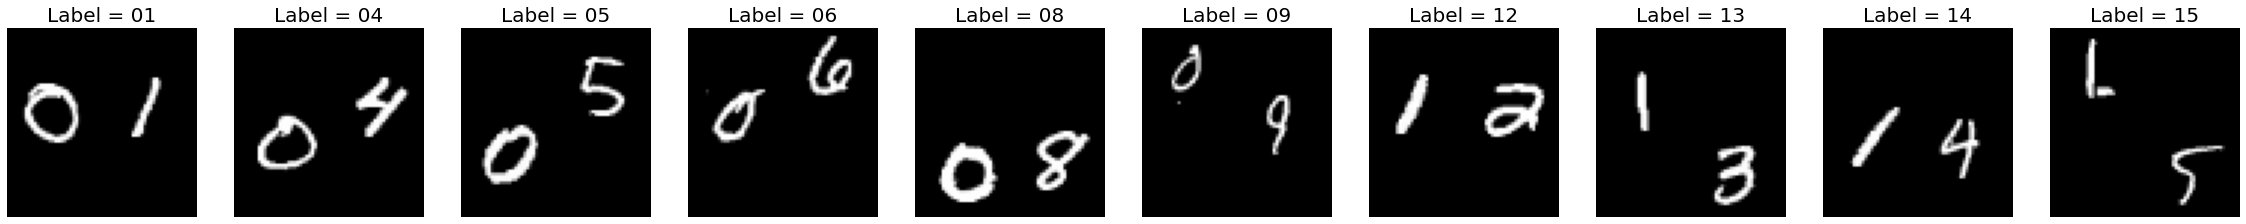

In [5]:
import matplotlib.pyplot as plt

def display_samples(samples, labels, num=10):
    max_l = num*1000
    plt.figure(figsize=(40,8*num))
    for index in range(0,max_l,1000):
        plt.subplot(1, num, index//1000+1)
        plt.imshow(samples[index], cmap='gray')
        plt.title(f'Label = {get_label_from_one_hot(labels[index])}',fontsize=20)
        plt.axis('off')
    plt.show()

display_samples(train_X.numpy(), train_y.numpy())

In [6]:
class DoubleMNISTDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.labels[idx]
        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

train_dataset = DoubleMNISTDataset(train_X,train_y)
val_dataset = DoubleMNISTDataset(val_X,val_y)
test_dataset = DoubleMNISTDataset(test_X,test_y)

In [7]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

### Multi MNIST MLP

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

class MultiMNISTMLP(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(MultiMNISTMLP, self).__init__()
        
        layers = []
        in_size = input_size
        
        for h_size in hidden_layers:
            layers.append(nn.Linear(in_size, h_size))
            layers.append(nn.ReLU())
            in_size = h_size
            
        layers.append(nn.Linear(in_size, output_size))
        layers.append(nn.Sigmoid())  # Sigmoid for multi-label classification
        
        self.model = nn.Sequential(*layers)
        
    def forward(self, x):
        x = x.view(x.size(0), -1).float()  # Flatten the input
        # print(x.shape)
        # print(self.model)
        return self.model(x)

model = MultiMNISTMLP(4096, [512, 256], 10)

In [10]:
hidden_layer_configs = [[512,128], [256], [128, 128], [512, 256], [128, 256], [256, 128]]

best_val_accuracy = 0.0
best_model = None

for config in hidden_layer_configs:
    model = MultiMNISTMLP(4096, config, 10)
    optimizer = optim.Adam(model.parameters(),lr=0.2)
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss for multi-label classification
    
    # Train the model (assuming 5 epochs for demonstration)
    for epoch in range(10):
        print(f"epoch {epoch}")
        model.train()
        for images, labels in train_loader:  # labels here are already one-hot encoded
            outputs = model(images)
            # print(outputs,labels)
            loss = criterion(outputs, labels.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Validate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            predicted = (outputs > 0.5).float()  # Apply threshold
            total += labels.size(0)
            correct+= (predicted == labels).sum().item()
            
    val_accuracy = correct / total
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model = model

    print(f"Config: {config} - Validation Accuracy: {val_accuracy*100:.2f}%")


epoch 0


/tmp/ipykernel_66641/4150324884.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
Config: [512, 128] - Validation Accuracy: 800.00%
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
Config: [256] - Validation Accuracy: 800.00%
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
Config: [128, 128] - Validation Accuracy: 800.00%
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
Config: [512, 256] - Validation Accuracy: 800.00%
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
Config: [128, 256] - Validation Accuracy: 800.00%
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
Config: [256, 128] - Validation Accuracy: 800.00%


### From the above, for 10 epochs , all of the configurations are equivalent in terms of validation accuracy, hence we can say the best Hyperparameter : [512,256]

### CNN Model For Double MNIST

In [12]:
class DoubleMNISTModel(nn.Module):
    def __init__(self):
        super(DoubleMNISTModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64*14*14, 128)  
        self.fc2_digit = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.MaxPool2d(2)(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = nn.MaxPool2d(2)(x)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2_digit(x)
        x = nn.Sigmoid()(x)
        return x

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DoubleMNISTModel().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, train_loader,epoch):
    model.train()
    total_loss = 0
    samples_trained = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.type('torch.FloatTensor')
        target = target.type('torch.FloatTensor')
        samples_trained+=target.shape[0]
        
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data.unsqueeze(1))
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    total_loss /= samples_trained
    print(f"Epoch {epoch+1} total_train_loss = {total_loss}")
    

# Train for a few epochs (e.g., 5) for brevity
for epoch in range(50):
    train(model, train_loader,epoch)

/tmp/ipykernel_66641/4150324884.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


Epoch 1 total_train_loss = 0.006770751799681577
Epoch 2 total_train_loss = 0.002479771873560445
Epoch 3 total_train_loss = 0.001598061668188793
Epoch 4 total_train_loss = 0.0011892594269573174
Epoch 5 total_train_loss = 0.0009242775100845329
Epoch 6 total_train_loss = 0.000746736930643112
Epoch 7 total_train_loss = 0.0006199966115748574
Epoch 8 total_train_loss = 0.0005410682604304948


KeyboardInterrupt: 

In [14]:
# validation
# keep the threshold as 0.5

def multi_label_accuracy(output, target, threshold=0.5):
    """
    Compute the accuracy for multi-label classification.
    
    :param output: Tensor of raw predictions, shape (batch_size, num_labels)
    :param target: True labels, shape (batch_size, num_labels)
    :param threshold: Decision threshold for determining label presence
    :return: Accuracy
    """
    with torch.no_grad():
        # Convert outputs to binary labels based on the threshold
        predicted_labels = (output > threshold).float()


        # Calculate number of correctly predicted labels for each sample
        correct_labels = (predicted_labels == target).float().sum(dim=1)

    
        # Calculate accuracy as ratio of correctly predicted labels to total labels
        overall_accuracy = (correct_labels == target.size(1)).float().sum()

        # Calculate overall accuracy
        # overall_accuracy = accuracy_per_sample.mean().item()

    return overall_accuracy

In [31]:
def multi_label_accuracy_hm(output, target, threshold=0.5):
    """
    Compute the accuracy for multi-label classification.
    
    :param output: Tensor of raw predictions, shape (batch_size, num_labels)
    :param target: True labels, shape (batch_size, num_labels)
    :param threshold: Decision threshold for determining label presence
    :return: Accuracy
    """
    with torch.no_grad():
        # Binarize the predictions
        y_pred_binarized = (output > threshold).float()
        
        # Calculate correct predictions
        correct = (y_pred_binarized == target).float().sum()
        
        # Total number of labels
        total = target.numel()  # Number of elements in y
        
        # print(correct,total)
        accuracy = correct
        return accuracy.item()

In [16]:
"""
Without hamming loss accuracy

"""
with torch.no_grad():
    train_acc =0 
    tot_samples = 0
    for (data, target) in val_loader:
        tot_samples+=len(data)
        data = data.type('torch.FloatTensor')
        target = target.type('torch.FloatTensor')
        
        data, target = data.to(device), target.to(device)
        output = model(data.unsqueeze(1))

        train_acc+=multi_label_accuracy(output,target)
    train_acc=train_acc/tot_samples
    print("The validation accuracy is :",train_acc.item())

/tmp/ipykernel_66641/4150324884.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


The validation accuracy is : 0.3703571557998657


#### Validation accuracy here (without hamming loss accuracy) : 37 %

In [32]:
"""
With hamming loss accuracy
"""

with torch.no_grad():
    train_acc =0 
    tot_samples = 0
    for (data, target) in val_loader:
        tot_samples+=len(data)*10
        data = data.type('torch.FloatTensor')
        target = target.type('torch.FloatTensor')
        
        data, target = data.to(device), target.to(device)
        output = model(data.unsqueeze(1))

        train_acc+=multi_label_accuracy_hm(output,target)
        # print(train_acc,len(data))
    # print(tot_samples,train_acc)
    train_acc=train_acc/tot_samples
    print("The validation accuracy is :",train_acc)

/tmp/ipykernel_66641/4150324884.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


The validation accuracy is : 0.9207642857142857


#### Validation accuracy here (with hamming loss accuracy) : 37 %

### Thus with Hamming loss we are able to achieve 92 % Accuracy

### Thus we are able to achieve 80% of the accuracy on the dataset

# Analysis CNN vs MLP

### 1. I think the CNN tends to converge a little slowly than MLP, but the increase of Accuracy in CNN is more than the increase of accuracy in MLP per epoch .


### 2. In terms of overfitting, the MLP will tend to overfit more quickly because of a large number of paramters due to the existence of only FC layers, while the convolutions in CNN will make the CNN spatially equivariant and can generalize more with weight sharing capabilities.

### THE END

TRANSFORMERS vs CNNs

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.optim import Adam,lr_scheduler,SGD
import wandb
import numpy as np
device = "cuda:1" if torch.cuda.is_available() else "cpu"
"""
Take batch_size as 500
"""
batch_size=500

## Dataset and Dataloader

In [7]:
train_set = MNIST('./',train=True,transform = ToTensor() , download=True) 
test_set = MNIST('./',train=False,transform = ToTensor() , download=True) 

In [3]:
train_loader = DataLoader(train_set,batch_size=batch_size,shuffle=True,num_workers=8)
test_loader = DataLoader(test_set,batch_size=batch_size,shuffle=True,num_workers=8)

## Create a CNN model class 

In [4]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv_layer_1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(5,5),padding=2)
        self.avg_pool_layer = nn.AvgPool2d(kernel_size=(2,2),stride=2) 
        self.conv_layer_2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=(5,5),padding=0)
        self.fc1 = nn.Linear(400,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,input):
      
        output = torch.sigmoid(self.conv_layer_1(input))
        output = self.avg_pool_layer(output)
        
        output = torch.sigmoid(self.conv_layer_2(output))
        output = self.avg_pool_layer(output)
        
        output = output.view(-1,16*5*5)
        output = torch.sigmoid(self.fc1(output))
        output = torch.sigmoid(self.fc2(output))
        output = self.fc3(output)

        return output

## Create a Model Train and Test class

In [18]:
class train_test:
    def __init__(self,model,train_loader,test_loader,project_name="nil",run_name="nil",optimizer="Adam-vanilla",lr=0.001,iswandb=0):
        self.model = model
        self.lr = lr
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.iswandb = iswandb
        self.run_name = run_name
        self.project_name = project_name
        self.criterion = nn.CrossEntropyLoss()

        if optimizer=="Adam-vanilla":
            self.optimizer = Adam(self.model.parameters(),lr=self.lr)
        else:
            self.optimizer = SGD(self.model.parameters(),lr=self.lr)
        
        self.scheduler = lr_scheduler.ReduceLROnPlateau(self.optimizer,mode='min',factor=0.1,patience=3,min_lr=0.0001,verbose=True)
    
    def train_loop(self):
        train_loss = 0
        for (images,labels) in self.train_loader:
            # zero out the remaining grads
            self.optimizer.zero_grad()
            
            images = images.to(device)
            labels = labels.to(device)
            
            output = self.model(images)
            loss = self.criterion(output,labels)
            #calculate gradients
            loss.backward()
            for k,v in model.named_parameters():
                if v.grad is None:
                    print("Yes")
            train_loss+=loss.item()
            
            #update weights
            self.optimizer.step()


        # avg loss per batch
        train_loss = train_loss/len(self.train_loader)
        return train_loss

    def evaluate(self,data_loader):

        accuracy = 0
        samples_evaluated = 0
        loss = 0
        
        for (images,labels) in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            output = self.model(images)
            
            l = self.criterion(output,labels)
            loss+=l.item()
            
            predicted_labels = torch.argmax(output,dim=1)
            accuracy += torch.sum(predicted_labels==labels)
            samples_evaluated+= images.size(0)

        # loss averaged over per batch
        loss = loss / len(data_loader)
        accuracy = accuracy/samples_evaluated
        return loss,accuracy

    def train(self,num_epochs):
        if self.iswandb:
            wandb.init(
            project=self.project_name,
            name=self.run_name,
            
            config={
            "architecture": "LeNet",
            "dataset": "MNIST",
                }
            )

        for epoch in range(num_epochs):
            train_loss = self.train_loop()
            _,train_accuracy = self.evaluate(self.train_loader)
            print(f"Epoch {epoch+1} - train_loss : {train_loss} and train_accuracy : {train_accuracy}")
            test_loss, test_accuracy = self.test()

            self.scheduler.step(train_loss)
            
            if self.iswandb:
                wandb.log({"train_loss":train_loss, "train_accuracy" : train_accuracy , "test_loss" : test_loss ,"test_accuracy" : test_accuracy})
        if self.iswandb:
            wandb.finish()
            
            
    def test(self):
        test_loss,test_accuracy = self.evaluate(self.test_loader)
        print(f"Evaluation : test_loss : {test_loss} and test_accuracy : {test_accuracy}")
        return test_loss,test_accuracy

## Runnable code

In [143]:
model = LeNet()
print(device)
model = model.to(device)
train_test_kit = train_test(model = model , train_loader = train_loader, test_loader = test_loader ,project_name="CV-assignment-2",run_name="LeNet-1",lr = 0.001,optimizer="Adam-vanilla",iswandb=1)

cuda:1


In [7]:
# Train the model
train_test_kit.train(num_epochs=100)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rohan-victorious108. Use `wandb login --relogin` to force relogin


Epoch 1 - train_loss : 2.3027629633744557 and train_accuracy : 0.1718166619539261
Evaluation : test_loss : 2.2934046268463133 and test_accuracy : 0.1678999960422516
Epoch 2 - train_loss : 1.6228123957912126 and train_accuracy : 0.7590500116348267
Evaluation : test_loss : 0.8720373123884201 and test_accuracy : 0.763700008392334
Epoch 3 - train_loss : 0.6494706777234872 and train_accuracy : 0.8628333210945129
Evaluation : test_loss : 0.4786845460534096 and test_accuracy : 0.8675000071525574
Epoch 4 - train_loss : 0.41775435308615366 and train_accuracy : 0.8990333676338196
Evaluation : test_loss : 0.34431324899196625 and test_accuracy : 0.9016000032424927
Epoch 5 - train_loss : 0.32145126921435196 and train_accuracy : 0.9139666557312012
Evaluation : test_loss : 0.2884376622736454 and test_accuracy : 0.9168999791145325
Epoch 6 - train_loss : 0.26751742598911127 and train_accuracy : 0.9281333684921265
Evaluation : test_loss : 0.23531895205378534 and test_accuracy : 0.9311999678611755
Epoch 

test_accuracy,▁▇██████████████████████████████████████
test_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▇▇█████████████████████████████████████
train_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,0.9893
test_loss,0.03703
train_accuracy,0.99933
train_loss,0.00594


### The above is the base model for a LeNet giving 99.93 % train accuracy and 98.93 % as test accuracy in 100 epochs

## Hyperparameter Tuning

In [8]:
optimizer_choices = ["Adam-vanilla","SGD-vanilla"]
batch_sizes = [250,500]
learning_rate = [0.01,0.001]

In [9]:
for optim_hp in optimizer_choices:
    for batch_hp in batch_sizes:
        for lr_hp in learning_rate:
            model = LeNet()
            model = model.to(device)

            train_loader = DataLoader(train_set,batch_size=batch_hp,shuffle=True,num_workers=8)
            test_loader = DataLoader(test_set,batch_size=batch_hp,shuffle=True,num_workers=8)
            train_test_kit = train_test(model = model , train_loader = train_loader, test_loader = test_loader ,project_name="CV-assignment-2",run_name=f"LeNet-1-{optim_hp}-{batch_hp}-{lr_hp}-run",lr = lr_hp,optimizer=optim_hp,iswandb=1)
            train_test_kit.train(num_epochs=100)

Epoch 1 - train_loss : 2.304461274544398 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.301290434598923 and test_accuracy : 0.11349999904632568
Epoch 2 - train_loss : 2.3017318626244863 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3013121485710144 and test_accuracy : 0.11349999904632568
Epoch 3 - train_loss : 2.301631819208463 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3010940551757812 and test_accuracy : 0.11349999904632568
Epoch 4 - train_loss : 2.301687945922216 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3018168568611146 and test_accuracy : 0.11349999904632568
Epoch 5 - train_loss : 2.1584844425320626 and train_accuracy : 0.43461668491363525
Evaluation : test_loss : 1.4453031480312348 and test_accuracy : 0.42549997568130493
Epoch 6 - train_loss : 0.5892591670776407 and train_accuracy : 0.9257833361625671
Evaluation : test_loss : 0.24078160300850868 and test_accuracy : 0.9257999658584595
Epo

test_accuracy,▁▁██████████████████████████████████████
test_loss,██▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▁▇█████████████████████████████████████
train_loss,██▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,0.9826
test_loss,0.07991
train_accuracy,0.99992
train_loss,0.00108


Epoch 1 - train_loss : 2.041732647518317 and train_accuracy : 0.6950166821479797
Evaluation : test_loss : 1.071414904296398 and test_accuracy : 0.703000009059906
Epoch 2 - train_loss : 0.6616711590439082 and train_accuracy : 0.8836666941642761
Evaluation : test_loss : 0.41601992920041087 and test_accuracy : 0.8870999813079834
Epoch 3 - train_loss : 0.35102351419627664 and train_accuracy : 0.914900004863739
Evaluation : test_loss : 0.2819466572254896 and test_accuracy : 0.9186999797821045
Epoch 4 - train_loss : 0.26313611802955467 and train_accuracy : 0.9293166995048523
Evaluation : test_loss : 0.22648528330028056 and test_accuracy : 0.9322999715805054
Epoch 5 - train_loss : 0.21373945691933235 and train_accuracy : 0.9404333233833313
Evaluation : test_loss : 0.19481660649180413 and test_accuracy : 0.9409999847412109
Epoch 6 - train_loss : 0.18118168745810787 and train_accuracy : 0.9509333372116089
Evaluation : test_loss : 0.16058665774762632 and test_accuracy : 0.9497999548912048
Epoch 

test_accuracy,▁▆▇▇████████████████████████████████████
test_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▆▇▇▇▇██████████████████████████████████
train_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,0.9888
test_loss,0.04183
train_accuracy,0.99972
train_loss,0.00208


Epoch 1 - train_loss : 2.305462207396825 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.30126006603241 and test_accuracy : 0.11349999904632568
Epoch 2 - train_loss : 2.301559309164683 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3013842940330504 and test_accuracy : 0.11349999904632568
Epoch 3 - train_loss : 2.3016059339046477 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3011163234710694 and test_accuracy : 0.11349999904632568
Epoch 4 - train_loss : 2.3014965891838073 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3014137744903564 and test_accuracy : 0.11349999904632568
Epoch 5 - train_loss : 2.3014594356218976 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3013473033905028 and test_accuracy : 0.11349999904632568
Epoch 6 - train_loss : 2.3017013947168987 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3011870861053465 and test_accuracy : 0.11349999904632568
Ep

test_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃█
test_loss,█████████████████████████████████████▅▂▁
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃█
train_loss,█████████████████████████████████████▅▂▁
test_accuracy,0.2126
test_loss,2.05623
train_accuracy,0.20945
train_loss,2.07143


Epoch 1 - train_loss : 2.297073620557785 and train_accuracy : 0.21106666326522827
Evaluation : test_loss : 2.2259733080863953 and test_accuracy : 0.2126999944448471
Epoch 2 - train_loss : 1.4745457316438357 and train_accuracy : 0.7492333650588989
Evaluation : test_loss : 0.8516142129898071 and test_accuracy : 0.7590999603271484
Epoch 3 - train_loss : 0.6656148297091325 and train_accuracy : 0.8512666821479797
Evaluation : test_loss : 0.5102118164300918 and test_accuracy : 0.8575999736785889
Epoch 4 - train_loss : 0.4431036392847697 and train_accuracy : 0.8917500376701355
Evaluation : test_loss : 0.3687558829784393 and test_accuracy : 0.8959999680519104
Epoch 5 - train_loss : 0.3420918534199397 and train_accuracy : 0.907633364200592
Evaluation : test_loss : 0.30114936679601667 and test_accuracy : 0.9134999513626099
Epoch 6 - train_loss : 0.2886920979867379 and train_accuracy : 0.9213166832923889
Evaluation : test_loss : 0.2564591780304909 and test_accuracy : 0.9225999712944031
Epoch 7 - 

test_accuracy,▁▇▇█████████████████████████████████████
test_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▇▇▇████████████████████████████████████
train_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,0.9882
test_loss,0.04131
train_accuracy,0.99765
train_loss,0.00994


Epoch 1 - train_loss : 2.303156387805939 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.301204651594162 and test_accuracy : 0.11349999904632568
Epoch 2 - train_loss : 2.3014036337534587 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3010697245597838 and test_accuracy : 0.11349999904632568
Epoch 3 - train_loss : 2.301500137646993 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3011069536209106 and test_accuracy : 0.11349999904632568
Epoch 4 - train_loss : 2.3014475295941037 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.300962543487549 and test_accuracy : 0.11349999904632568
Epoch 5 - train_loss : 2.301390627026558 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3011301517486573 and test_accuracy : 0.11349999904632568
Epoch 6 - train_loss : 2.3014056235551834 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3011085391044617 and test_accuracy : 0.11349999904632568
Epo

test_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▅▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,0.1135
test_loss,2.30101
train_accuracy,0.11237
train_loss,2.30116


Epoch 1 - train_loss : 2.3238526423772177 and train_accuracy : 0.09751667082309723
Evaluation : test_loss : 2.3150070190429686 and test_accuracy : 0.0973999947309494
Epoch 2 - train_loss : 2.3086220850547154 and train_accuracy : 0.09751667082309723
Evaluation : test_loss : 2.305953973531723 and test_accuracy : 0.0973999947309494
Epoch 3 - train_loss : 2.303578339020411 and train_accuracy : 0.10218333452939987
Evaluation : test_loss : 2.3028283596038817 and test_accuracy : 0.10099999606609344
Epoch 4 - train_loss : 2.3019504944483438 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3017223954200743 and test_accuracy : 0.11349999904632568
Epoch 5 - train_loss : 2.301439489920934 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3013175666332244 and test_accuracy : 0.11349999904632568
Epoch 6 - train_loss : 2.301276054978371 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.30115430355072 and test_accuracy : 0.11349999904632568
Epoch 

test_accuracy,▁▃██████████████████████████████████████
test_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▃██████████████████████████████████████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,0.1135
test_loss,2.30103
train_accuracy,0.11237
train_loss,2.30117


Epoch 1 - train_loss : 2.308697197834651 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.301096725463867 and test_accuracy : 0.11349999904632568
Epoch 2 - train_loss : 2.3013347049554187 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.301045060157776 and test_accuracy : 0.11349999904632568
Epoch 3 - train_loss : 2.30129238764445 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.301057493686676 and test_accuracy : 0.11349999904632568
Epoch 4 - train_loss : 2.3013058483600615 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3009814381599427 and test_accuracy : 0.11349999904632568
Epoch 5 - train_loss : 2.301332887013753 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3010546922683717 and test_accuracy : 0.11349999904632568
Epoch 6 - train_loss : 2.301280923684438 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.301050865650177 and test_accuracy : 0.11349999904632568
Epoch 0

test_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▅▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,0.1135
test_loss,2.30102
train_accuracy,0.11237
train_loss,2.30116


Epoch 1 - train_loss : 2.3328197836875915 and train_accuracy : 0.09915000200271606
Evaluation : test_loss : 2.325522947311401 and test_accuracy : 0.10089999437332153
Epoch 2 - train_loss : 2.3196940938631694 and train_accuracy : 0.09915000200271606
Evaluation : test_loss : 2.315490388870239 and test_accuracy : 0.10089999437332153
Epoch 3 - train_loss : 2.3119825581709543 and train_accuracy : 0.09915000200271606
Evaluation : test_loss : 2.3095514297485353 and test_accuracy : 0.10089999437332153
Epoch 4 - train_loss : 2.307466506958008 and train_accuracy : 0.09915000200271606
Evaluation : test_loss : 2.306076264381409 and test_accuracy : 0.10089999437332153
Epoch 5 - train_loss : 2.304823424418767 and train_accuracy : 0.09915000200271606
Evaluation : test_loss : 2.3040059089660643 and test_accuracy : 0.10089999437332153
Epoch 6 - train_loss : 2.3032842457294462 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.3028013467788697 and test_accuracy : 0.11349999904632568
Epo

test_accuracy,▁▁██████████████████████████████████████
test_loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▁██████████████████████████████████████
train_loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,0.1135
test_loss,2.30101
train_accuracy,0.11237
train_loss,2.30115


### Comparison
It is clear from the findings that the Best CNN Model performs better than the Best SIFT-SVM BoVW Model. This is because, whereas the CNN Model offers accuracy of 98.82% on test set, the SIFT Model only offers us appx 65% accuracy on test set. SIFT Detector and Descriptor is not able to capture the localised features in any given region of the image to the same extent as the CNN based Model because convolution operators with different Kernels with the entire image are able to capture the various localised regions in the image because of varied intensities and RGB values of different pixels.

## If conv layers get doubled !!

In [12]:
class LeNet_adv(nn.Module):
    def __init__(self):
        super(LeNet_adv,self).__init__()
        self.conv_layer_1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(5,5),padding=2)
        self.conv_layer_1_repeated = nn.Conv2d(in_channels=6,out_channels=6,kernel_size=(5,5),padding=2)
        
        self.avg_pool_layer = nn.AvgPool2d(kernel_size=(2,2),stride=2) 
        self.conv_layer_2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=(5,5),padding=0)
        self.conv_layer_2_repeated = nn.Conv2d(in_channels=16,out_channels=16,kernel_size=(5,5),padding=2)
        
        self.fc1 = nn.Linear(400,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,input):
      
        output = torch.sigmoid(self.conv_layer_1(input))
        output = torch.sigmoid(self.conv_layer_1_repeated(output))
        
        output = self.avg_pool_layer(output)
        
        output = torch.sigmoid(self.conv_layer_2(output))
        output = torch.sigmoid(self.conv_layer_2_repeated(output))
        
        output = self.avg_pool_layer(output)
        
        output = output.view(-1,16*5*5)
        output = torch.sigmoid(self.fc1(output))
        output = torch.sigmoid(self.fc2(output))
        output = self.fc3(output)

        return output

In [16]:
model = LeNet_adv()
model = model.to(device)

train_loader = DataLoader(train_set,batch_size=batch_hp,shuffle=True,num_workers=8)
test_loader = DataLoader(test_set,batch_size=batch_hp,shuffle=True,num_workers=8)
train_test_kit = train_test(model = model , train_loader = train_loader, test_loader = test_loader ,project_name="CV-assignment-2",run_name=f"LeNet-1-double-CNlayer-run",lr = 0.001,optimizer="Adam-vanilla",iswandb=1)
train_test_kit.train(num_epochs=100)

Epoch 1 - train_loss : 2.3033474326133727 and train_accuracy : 0.11236666887998581
Evaluation : test_loss : 2.302087390422821 and test_accuracy : 0.11349999904632568
Epoch 2 - train_loss : 2.064785972237587 and train_accuracy : 0.5425000190734863
Evaluation : test_loss : 1.4864380717277528 and test_accuracy : 0.5467000007629395
Epoch 3 - train_loss : 1.0740616222222645 and train_accuracy : 0.7470333576202393
Evaluation : test_loss : 0.7959192514419555 and test_accuracy : 0.7526999711990356
Epoch 4 - train_loss : 0.6503109201788903 and train_accuracy : 0.8299000263214111
Evaluation : test_loss : 0.5160939484834671 and test_accuracy : 0.8323999643325806
Epoch 5 - train_loss : 0.4501268150905768 and train_accuracy : 0.8880167007446289
Evaluation : test_loss : 0.37302061915397644 and test_accuracy : 0.8901000022888184
Epoch 6 - train_loss : 0.3362951340774695 and train_accuracy : 0.9161166548728943
Evaluation : test_loss : 0.28417338952422144 and test_accuracy : 0.9138000011444092
Epoch 7 

test_accuracy,▁▆▇█████████████████████████████████████
test_loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▆▇█████████████████████████████████████
train_loss,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,0.9899
test_loss,0.04198
train_accuracy,0.99972
train_loss,0.00303


## Sample dataset and check accuracy

In [17]:
train_sampling = [600,1800,6000,18000,60000]

In [2]:
def sample_mnist(x):
    transform = ToTensor()
    X, y = train_set.data.numpy(), np.array(train_set.targets)

    class_indices = [np.where(y == i)[0] for i in range(10)]

    sampled_indices = np.concatenate([np.random.choice(indices, x // 10, replace=False) for indices in class_indices])

    np.random.shuffle(sampled_indices)

    sampled_X = X[sampled_indices]
    sampled_y = y[sampled_indices]

    return sampled_X, sampled_y

In [9]:
class DatasetSampled(Dataset):
    def __init__(self,X,y,transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.y)

    def __getitem__(self,idx):
        if self.transform:
            return self.transform(self.X[idx]),self.y[idx]
        else:
            return self.X[idx],self.y[idx]

In [20]:
for sampling_size in train_sampling:
    
    model = LeNet()
    model = model.to(device)
    
    X,y = sample_mnist(sampling_size)
    train_set_ = DatasetSampled(X,y,transform=ToTensor())
    train_loader = DataLoader(train_set_,batch_size=500,shuffle=True)
    test_loader = DataLoader(test_set,batch_size=500,shuffle=True)

    train_test_kit = train_test(model = model , train_loader = train_loader, test_loader = test_loader ,project_name="CV-assignment-2",run_name=f"run-train_set_size-{sampling_size}",lr = 0.001,optimizer="Adam-vanilla",iswandb=1)
    train_test_kit.train(num_epochs=100)

Epoch 1 - train_loss : 2.3423627614974976 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.3149996280670164 and test_accuracy : 0.11349999904632568
Epoch 2 - train_loss : 2.3133338689804077 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.305329144001007 and test_accuracy : 0.11349999904632568
Epoch 3 - train_loss : 2.303249955177307 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.3041249752044677 and test_accuracy : 0.0973999947309494
Epoch 4 - train_loss : 2.3045566082000732 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.3072847723960876 and test_accuracy : 0.10319999605417252
Epoch 5 - train_loss : 2.3105592727661133 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.310975658893585 and test_accuracy : 0.10319999605417252
Epoch 6 - train_loss : 2.3100253343582153 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.312427306175232 and test_accuracy : 0.10319999605417252
Epo

test_accuracy,▇▃▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄█▁▁▄▃▃▄▄▄▄▄▄▄▇▇▇▁▁▄▄▃▃▃
test_loss,█▂▇▆▆▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▁▂▄▃▂▃▂▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▂
test_accuracy,0.0958
test_loss,2.3027
train_accuracy,0.1
train_loss,2.30425


Epoch 1 - train_loss : 2.341588795185089 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.311350679397583 and test_accuracy : 0.0957999974489212
Epoch 2 - train_loss : 2.307619333267212 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.303173565864563 and test_accuracy : 0.11349999904632568
Epoch 3 - train_loss : 2.3047712445259094 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.3080500960350037 and test_accuracy : 0.10099999606609344
Epoch 4 - train_loss : 2.308018445968628 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.3088416337966917 and test_accuracy : 0.10099999606609344
Epoch 5 - train_loss : 2.306749641895294 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.3048771262168883 and test_accuracy : 0.10099999606609344
Epoch 6 - train_loss : 2.304201662540436 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.3021276593208313 and test_accuracy : 0.10099999606609344
Epoch 

test_accuracy,▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▄▂▁▁▆▄▄▁▂▂▃▇▇▆▅▅▆▇██▇
test_loss,█▆▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▁▁
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▂▁▁▆▄▄▁▁▁▂▇▇▆▅▄▆▇██▇
train_loss,█▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
test_accuracy,0.2553
test_loss,2.29644
train_accuracy,0.24556
train_loss,2.29693


Epoch 1 - train_loss : 2.312535027662913 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.3083515524864198 and test_accuracy : 0.10319999605417252
Epoch 2 - train_loss : 2.3059268792470298 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.3022884845733644 and test_accuracy : 0.10089999437332153
Epoch 3 - train_loss : 2.304729441801707 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.303195261955261 and test_accuracy : 0.0982000008225441
Epoch 4 - train_loss : 2.3040839234987893 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.302027499675751 and test_accuracy : 0.10319999605417252
Epoch 5 - train_loss : 2.303304354349772 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.302642583847046 and test_accuracy : 0.09799999743700027
Epoch 6 - train_loss : 2.3028904596964517 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.3004603028297423 and test_accuracy : 0.10300000011920929
Epoch

test_accuracy,▁▁▁▃▄▅▆▆▇▇▇▇▇▇▇█████████████████████████
test_loss,████▇▆▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▁▁▂▄▅▆▆▆▇▇▇▇▇▇▇▇███████████████████████
train_loss,████▇▆▄▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,0.9424
test_loss,0.18385
train_accuracy,0.96417
train_loss,0.13325


Epoch 1 - train_loss : 2.3098587327533298 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.3022602438926696 and test_accuracy : 0.10279999673366547
Epoch 2 - train_loss : 2.3040473461151123 and train_accuracy : 0.10000000149011612
Evaluation : test_loss : 2.3029294490814207 and test_accuracy : 0.0973999947309494
Epoch 3 - train_loss : 2.2928610377841525 and train_accuracy : 0.2872222363948822
Evaluation : test_loss : 2.2568326354026795 and test_accuracy : 0.3034999966621399
Epoch 4 - train_loss : 2.101136608256234 and train_accuracy : 0.38883334398269653
Evaluation : test_loss : 1.8651157855987548 and test_accuracy : 0.40289998054504395
Epoch 5 - train_loss : 1.6389732029702928 and train_accuracy : 0.597777783870697
Evaluation : test_loss : 1.360921812057495 and test_accuracy : 0.6085999608039856
Epoch 6 - train_loss : 1.1893251803186204 and train_accuracy : 0.7064444422721863
Evaluation : test_loss : 0.9902430653572083 and test_accuracy : 0.7224999666213989
Epoch 7 

test_accuracy,▁▃▆▇▇▇▇█████████████████████████████████
test_loss,██▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▂▆▆▇▇▇▇▇███████████████████████████████
train_loss,██▅▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,0.9783
test_loss,0.0651
train_accuracy,0.993
train_loss,0.03083


ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
"""
Taking train set of original 60000 images
"""
model = LeNet()
model = model.to(device)
    
train_loader = DataLoader(train_set,batch_size=500,shuffle=True)
test_loader = DataLoader(test_set,batch_size=500,shuffle=True)

train_test_kit = train_test(model = model , train_loader = train_loader, test_loader = test_loader ,project_name="CV-assignment-2",run_name=f"run-train_set_size-{sampling_size}",lr = 0.001,optimizer="Adam-vanilla",iswandb=1)
train_test_kit.train(num_epochs=100)

Epoch 1 - train_loss : 2.299263121684392 and train_accuracy : 0.2266666740179062
Evaluation : test_loss : 2.2408687829971314 and test_accuracy : 0.23339998722076416
Epoch 2 - train_loss : 1.4317157094677289 and train_accuracy : 0.7478166818618774
Evaluation : test_loss : 0.8510778307914734 and test_accuracy : 0.7562999725341797
Epoch 3 - train_loss : 0.6706655859947205 and train_accuracy : 0.8606166839599609
Evaluation : test_loss : 0.5015702798962594 and test_accuracy : 0.8657000064849854
Epoch 4 - train_loss : 0.426322714984417 and train_accuracy : 0.8974166512489319
Evaluation : test_loss : 0.3477271094918251 and test_accuracy : 0.9009999632835388
Epoch 5 - train_loss : 0.32156705198188623 and train_accuracy : 0.9168166518211365
Evaluation : test_loss : 0.2769922465085983 and test_accuracy : 0.917199969291687
Epoch 6 - train_loss : 0.2660189662128687 and train_accuracy : 0.925433337688446
Evaluation : test_loss : 0.2376519463956356 and test_accuracy : 0.9289999604225159
Epoch 7 - tr

## Replace CNN model with Transformer Encoder

### Create a ViT based model class

In [15]:
class ViT(nn.Module):
    def __init__(self,image_shape=(28,28),patch_size=14,hd=32,outd=10,nhead=4,n_layers=2):
        super(ViT,self).__init__()
        self.image_shape = image_shape
        self.patch_size = patch_size
        self.patch_pixels = patch_size*patch_size
        self.num_patches = (image_shape[0]//patch_size) ** 2
        self.hd = hd
        self.outd = outd

        self.LinearProjection = nn.Linear(self.patch_pixels,self.hd)
        # For CLS encoding
        self.CLS = nn.Parameter(torch.rand(1,self.hd))

        # For POS embedding
        self.POS = torch.rand(1+self.num_patches, self.hd).to(device)
        
        self.transformer_encoder = nn.TransformerEncoder(nn.TransformerEncoderLayer(d_model=self.hd, nhead=nhead, dim_feedforward=self.hd,dropout=0.2,batch_first=True), num_layers=n_layers)

        # MLP head
        assert self.hd//2 >= outd
        self.mlp_head = nn.Sequential(
            nn.Linear(self.hd,self.hd//2),
            nn.ReLU(),
            nn.Linear(self.hd//2,self.outd)
        ) 
    
    def forward(self,input):
        patches = input.unfold(2, self.patch_size, self.patch_size).unfold(3, self.patch_size, self.patch_size)
        patches = patches.reshape(input.size(0),-1,self.patch_size, self.patch_size)
        patches = patches.view(input.size(0),-1,self.patch_size*self.patch_size)

        N = input.shape[0]
        emb = self.LinearProjection(patches)
        emb_cls = self.CLS.repeat(N,1,1)
        emb = torch.cat([emb_cls,emb],dim=1)
        
        emb_pos = self.POS.repeat(N,1,1)
        
        final_input = emb+emb_pos
        
        output_after_attn = self.transformer_encoder(final_input)
        final_output = self.mlp_head(output_after_attn[:,0,:])
        
        return final_output

In [26]:
train_loader = DataLoader(train_set,batch_size=batch_size,shuffle=True,num_workers=8)
test_loader = DataLoader(test_set,batch_size=batch_size,shuffle=True,num_workers=8)

In [27]:
model = ViT()
print(device)
model = model.to(device)
train_test_kit = train_test(model = model , train_loader = train_loader, test_loader = test_loader ,project_name="CV-assignment-2",run_name="VIT",lr = 0.01,optimizer="Adam-vanilla",iswandb=1)

cuda:1


In [28]:
# Train the model
train_test_kit.train(num_epochs=100)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rohan-victorious108. Use `wandb login --relogin` to force relogin


Epoch 1 - train_loss : 0.7834948495030403 and train_accuracy : 0.9026666879653931
Evaluation : test_loss : 0.33476534187793733 and test_accuracy : 0.9001999497413635
Epoch 2 - train_loss : 0.3054900505890449 and train_accuracy : 0.9240500330924988
Evaluation : test_loss : 0.2586559742689133 and test_accuracy : 0.9243999719619751
Epoch 3 - train_loss : 0.24315277350445588 and train_accuracy : 0.9266499876976013
Evaluation : test_loss : 0.24625566676259042 and test_accuracy : 0.9277999997138977
Epoch 4 - train_loss : 0.2144388347864151 and train_accuracy : 0.938800036907196
Evaluation : test_loss : 0.20212580636143684 and test_accuracy : 0.9388999938964844
Epoch 5 - train_loss : 0.19699109022816022 and train_accuracy : 0.948116660118103
Evaluation : test_loss : 0.18753774613142013 and test_accuracy : 0.9458999633789062
Epoch 6 - train_loss : 0.18877268619835377 and train_accuracy : 0.9454833269119263
Evaluation : test_loss : 0.19167326092720033 and test_accuracy : 0.9409999847412109
Epoc

test_accuracy,▁▄▅▆▆▆▆▆▆▇▇▇▇████▇██████████████████████
test_loss,█▅▄▃▃▃▃▃▃▂▁▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▃▅▅▆▆▆▆▆▇▇▇▇▇▇█████████████████████████
train_loss,█▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,0.9662
test_loss,0.11661
train_accuracy,0.9767
train_loss,0.07485


### Sample MNIST for 6000 images in train set

In [16]:
X,y = sample_mnist(6000)
train_set_ = DatasetSampled(X,y,transform=ToTensor())
train_loader = DataLoader(train_set_,batch_size=500,shuffle=True)
test_loader = DataLoader(test_set,batch_size=500,shuffle=True)

In [19]:
model = ViT()
print(device)
model = model.to(device)
train_test_kit = train_test(model = model , train_loader = train_loader, test_loader = test_loader ,project_name="CV-assignment-2",run_name="VIT_6k",lr = 0.01,optimizer="Adam-vanilla",iswandb=1)

cuda:1


In [20]:
# Train the model
train_test_kit.train(num_epochs=100)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rohan-victorious108. Use `wandb login --relogin` to force relogin


Epoch 1 - train_loss : 2.2128734389940896 and train_accuracy : 0.3101666569709778
Evaluation : test_loss : 1.9505979776382447 and test_accuracy : 0.32029998302459717
Epoch 2 - train_loss : 1.6174294749895732 and train_accuracy : 0.6231666803359985
Evaluation : test_loss : 1.1875273168087006 and test_accuracy : 0.6345999836921692
Epoch 3 - train_loss : 0.9616126269102097 and train_accuracy : 0.7459999918937683
Evaluation : test_loss : 0.7434821933507919 and test_accuracy : 0.7461000084877014
Epoch 4 - train_loss : 0.6841866075992584 and train_accuracy : 0.7914999723434448
Evaluation : test_loss : 0.6229469776153564 and test_accuracy : 0.7925999760627747
Epoch 5 - train_loss : 0.543172225356102 and train_accuracy : 0.8343333005905151
Evaluation : test_loss : 0.5288290202617645 and test_accuracy : 0.836899995803833
Epoch 6 - train_loss : 0.4688128779331843 and train_accuracy : 0.859333336353302
Evaluation : test_loss : 0.48680906891822817 and test_accuracy : 0.8507999777793884
Epoch 7 - t

test_accuracy,▁▆▇▇▇▇██████████████████████████████████
test_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▅▇▇▇▇▇▇█▇██████████████████████████████
train_loss,█▄▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,0.9383
test_loss,0.2501
train_accuracy,0.9875
train_loss,0.03954


### Observations

As the Training set size increases, Transformer is able to pay attention to the local context via the self attention mechanism and also since the examples it sees increases the Transformer's ability to capture local features.The classification accuracies with 60K Sized Image Dataset is higher than those obtained with 6K Sized Dataset. The corresponding accuracies obtained are as follows - 96.62% for 60000 images, 93.82% for 6000 images on test set. It is because Transformers are Data Hungry and require large datasets for the well functioning of Self-Attention Mechanism.

We observe that corresponding accuracies are higher in case of CNNs because CNNs are computationally efficient and capture the Local Features in a very fast manner compared to Transformers. It is because Self-Attention requires a very huge amount of time compared to Convolutional Operators.

The convergence rates for CNN are higher than that of Transformer but over a large run it is generally observed that transformer performs better that CNN model.This is generally because CNN well captures the local features but it also has inductive biases, which helps it to fit on the data and not generalize well.

### Challenges

1. Data loaders and datasets
2. Creating the ViT class.
3. The activation functions were a major challenge, faced difficulties in training without them.